各運氣評分組的遊戲結果數量：
運氣爆炸差: 2576
運氣極差: 9239
倒楣透頂: 42507
運氣不佳: 670691
運氣稍差: 59192
普通水準: 90009
運氣尚可: 44220
小吉: 43575
中吉: 14149
大吉: 11107
運氣極好: 10122
超級好運: 1297
歐皇現世: 1013
運氣之神降臨: 153
運氣之神降臨ProMax: 150


/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/447575701.py:133: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/447575701.py:133: UserWarning: Glyph 27683 (\N{CJK UNIFIED IDEOGRAPH-6C23}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/447575701.py:133: UserWarning: Glyph 29190 (\N{CJK UNIFIED IDEOGRAPH-7206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/447575701.py:133: UserWarning: Glyph 28856 (\N{CJK UNIFIED IDEOGRAPH-70B8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/447575701.py:133: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm

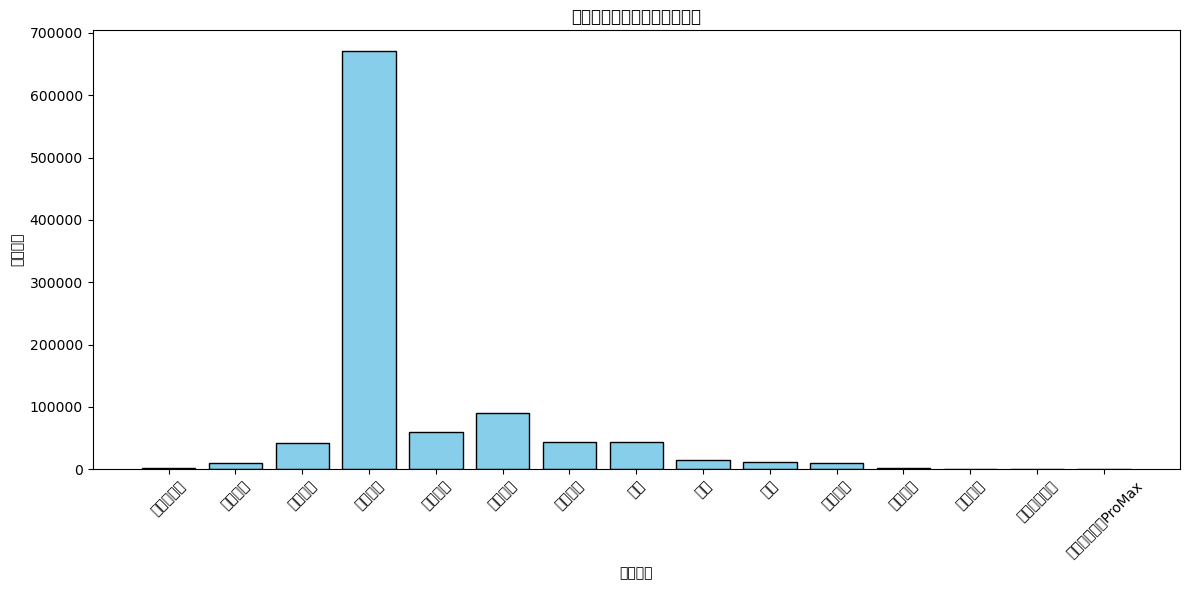

In [112]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def random_number():
    """
    使用指數衰減方式生成 1～50 的隨機數，alpha = 0.24
    機率權重計算：weight(x) = exp(-alpha * (x - 1))
    """
    alpha = 0.24
    numbers = list(range(1, 51))
    weights = [math.exp(-alpha * (x - 1)) for x in numbers]
    total_weight = sum(weights)
    rand_val = random.uniform(0, total_weight)
    cumulative = 0.0
    for num, weight in zip(numbers, weights):
        cumulative += weight
        if rand_val < cumulative:
            return num
    return 50

def simulate_game():
    """
    模擬一局遊戲：
      - 初始得分設為 1
      - 每一輪有 50% 機率踩到炸彈（結束遊戲）
      - 若安全則依照設定機率選擇運算子與數字來更新得分
      - 數字由 random_number() 產生，並除以 50 作為操作因子
    """
    score = 0  # 初始得分
    while True:
        # 50% 機率踩到炸彈，遊戲結束
        if random.random() < 0.5:
            break

        # 安全選項：根據機率選擇運算子
        op = random.choices(["+", "-", "*"], weights=[60, 10, 30], k=1)[0]
        # 依照指數衰減機率產生一個 1～50 的數字
        factor = random_number()

        # 根據運算子更新得分
        if op == "+":
            score += factor
        elif op == "-":
            score -= factor
        elif op == "*":
            score *= factor

    return score

def get_luck_rating(score):
    """
    根據最終得分，依照以下 15 個區間回傳運氣評分：
      1. 運氣爆炸差    : score < -1.0
      2. 運氣極差      : -1.0 ≤ score < -0.5
      3. 倒楣透頂      : -0.5 ≤ score < 0
      4. 運氣不佳      : 0 ≤ score < 1
      5. 運氣稍差      : 1 ≤ score < 2
      6. 普通水準      : 2 ≤ score < 3
      7. 運氣尚可      : 3 ≤ score < 4
      8. 小吉         : 4 ≤ score < 5
      9. 中吉         : 5 ≤ score < 6
      10. 大吉        : 6 ≤ score < 7
      11. 運氣極好     : 7 ≤ score < 8
      12. 超級好運     : 8 ≤ score < 9
      13. 歐皇現世     : 9 ≤ score < 10
      14. 運氣之神降臨 : 10 ≤ score < 11
      15. 運氣之神降臨ProMax : score ≥ 11
    """
    if score < -50:
        return "運氣爆炸差"
    elif score < -10:
        return "運氣極差"
    elif score < 0:
        return "倒楣透頂"
    elif score < 3:
        return "運氣不佳"
    elif score < 5:
        return "運氣稍差"
    elif score < 10:
        return "普通水準"
    elif score < 15:
        return "運氣尚可"
    elif score < 30:
        return "小吉"
    elif score < 50:
        return "中吉"
    elif score < 100:
        return "大吉"
    elif score < 500:
        return "運氣極好"
    elif score < 1000:
        return "超級好運"
    elif score < 5000:
        return "歐皇現世"
    elif score < 10000:
        return "運氣之神降臨"
    else:
        return "運氣之神降臨ProMax"

# 進行多次模擬
n_simulations = 1000000
results = [simulate_game() for _ in range(n_simulations)]
ratings = [get_luck_rating(score) for score in results]

# 統計各運氣評分組的數量
counts = Counter(ratings)

# 定義評分組的順序
categories = [
    "運氣爆炸差", "運氣極差", "倒楣透頂", "運氣不佳", "運氣稍差", "普通水準",
    "運氣尚可", "小吉", "中吉", "大吉", "運氣極好", "超級好運",
    "歐皇現世", "運氣之神降臨", "運氣之神降臨ProMax"
]

# 根據順序取出各組的數量
ordered_counts = [counts[cat] for cat in categories]

# 輸出各評分組的結果數量
print("各運氣評分組的遊戲結果數量：")
for cat, count in zip(categories, ordered_counts):
    print(f"{cat}: {count}")

# 繪製各運氣評分組數量的長條圖
plt.figure(figsize=(12, 6))
plt.bar(categories, ordered_counts, color='skyblue', edgecolor='black')
plt.xlabel('運氣評分')
plt.ylabel('遊戲數量')
plt.title('各運氣評分組的遊戲結果數量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



以實際得分區間統計（每10分一組，僅顯示出現次數 > 0）：
0.0 ~ 10.0 分：12 次
10.0 ~ 20.0 分：2 次
40.0 ~ 50.0 分：1 次


/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/2815501460.py:30: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/2815501460.py:30: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/2815501460.py:30: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/2815501460.py:30: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm04j506gbcjxw2cl7_k580000gn/T/ipykernel_51020/2815501460.py:30: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h8/tsvm

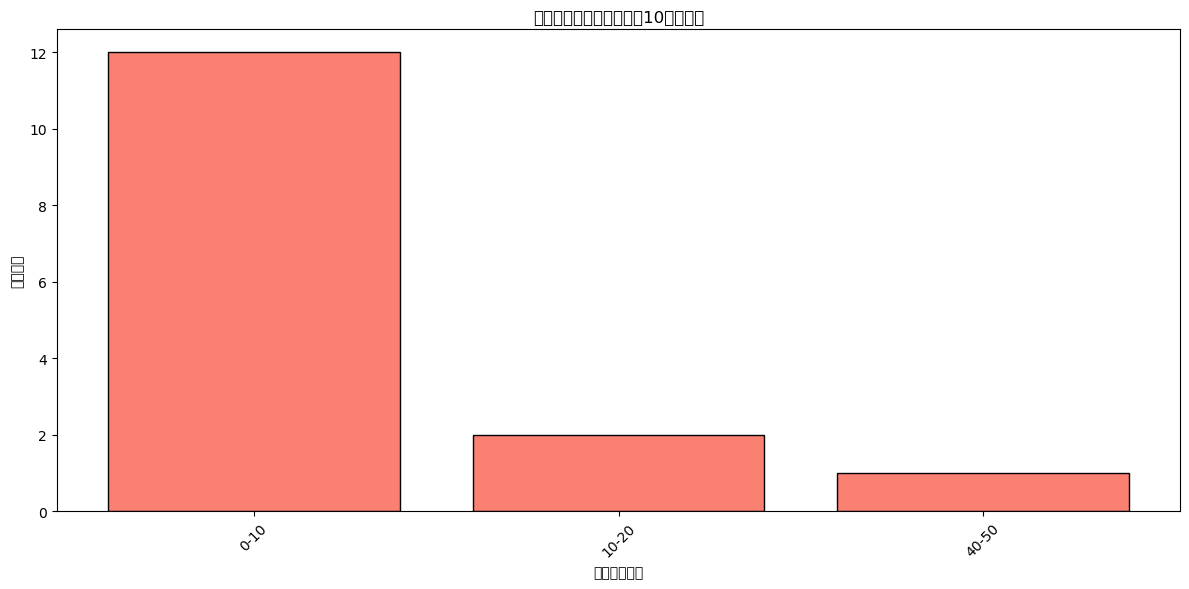

In [106]:
# 用 NumPy 分組實際得分（每 10 分一個區間）
bin_size = 10
max_score = max(results)
bins = np.arange(start=min(results), stop=max_score + bin_size, step=bin_size)

# 使用 NumPy 的 histogram 來分組計數
hist, bin_edges = np.histogram(results, bins=bins)

# 過濾出次數不為 0 的區間
filtered_hist = []
filtered_labels = []

print("\n以實際得分區間統計（每10分一組，僅顯示出現次數 > 0）：")
for i in range(len(hist)):
    if hist[i] > 0:
        lower = bin_edges[i]
        upper = bin_edges[i + 1]
        label = f"{lower:.1f} ~ {upper:.1f} 分"
        print(f"{label}：{hist[i]} 次")
        filtered_hist.append(hist[i])
        filtered_labels.append(f"{int(lower)}-{int(upper)}")

# 畫圖：僅顯示出現次數 > 0 的區間
plt.figure(figsize=(12, 6))
plt.bar(filtered_labels, filtered_hist, color='salmon', edgecolor='black')
plt.xlabel('實際得分區間')
plt.ylabel('出現次數')
plt.title('實際得分區間的統計（每10分一組）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
